# EDA – Tomato Dataset

In [1]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path

plt.style.use("seaborn-v0_8")

In [ ]:
# Define dataset paths
DATA_ROOT = Path("D:/Project/learn-comvis/data/raw")

EARLY_BLIGHT_DIR = DATA_ROOT / "Tomato___Early_blight"
HEALTHY_DIR = DATA_ROOT / "Tomato___healthy"

assert EARLY_BLIGHT_DIR.exists(), "Folder Tomato__Early_blight tidak ditemukan"
assert HEALTHY_DIR.exists(), "Folder Tomato___healthy tidak ditemukan"

In [ ]:
# Load image
early_files = sorted(glob(str(EARLY_BLIGHT_DIR / "*.jpg")))
healthy_files = sorted(glob(str(HEALTHY_DIR / "*.jpg")))

print(f"Tomato Early Blight : {len(early_files)}")
print(f"Tomato Healthy     : {len(healthy_files)}")

Tomato Early Blight : 1000
Tomato Healthy     : 1591


In [ ]:
# Define function to show image samples
def show_image_grid(image_paths, title, n_rows=4, n_cols=4, figsize=(10, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle(title, fontsize=14)

    for ax, img_path in zip(axes.flatten(), image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

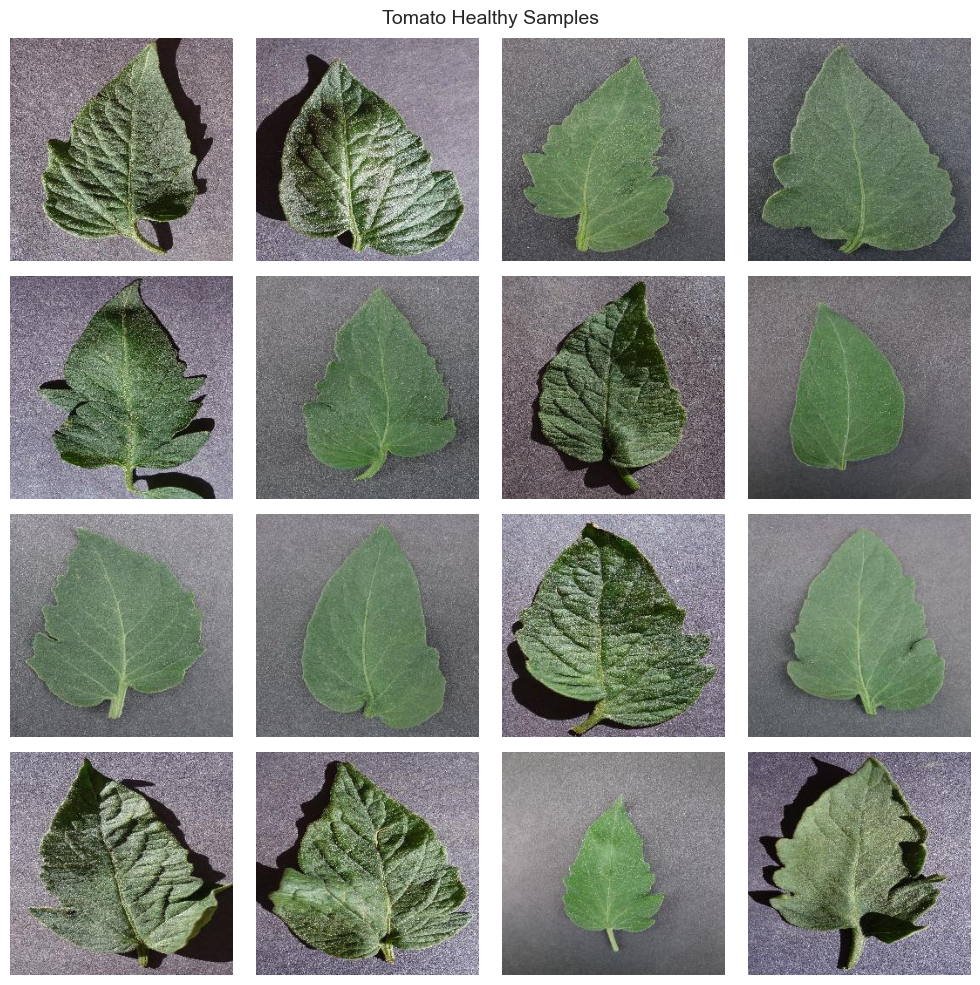

In [ ]:
# Sample Healthy
sample_healthy = random.sample(healthy_files, k=16)
show_image_grid(
    sample_healthy,
    title="Tomato Healthy Samples"
)


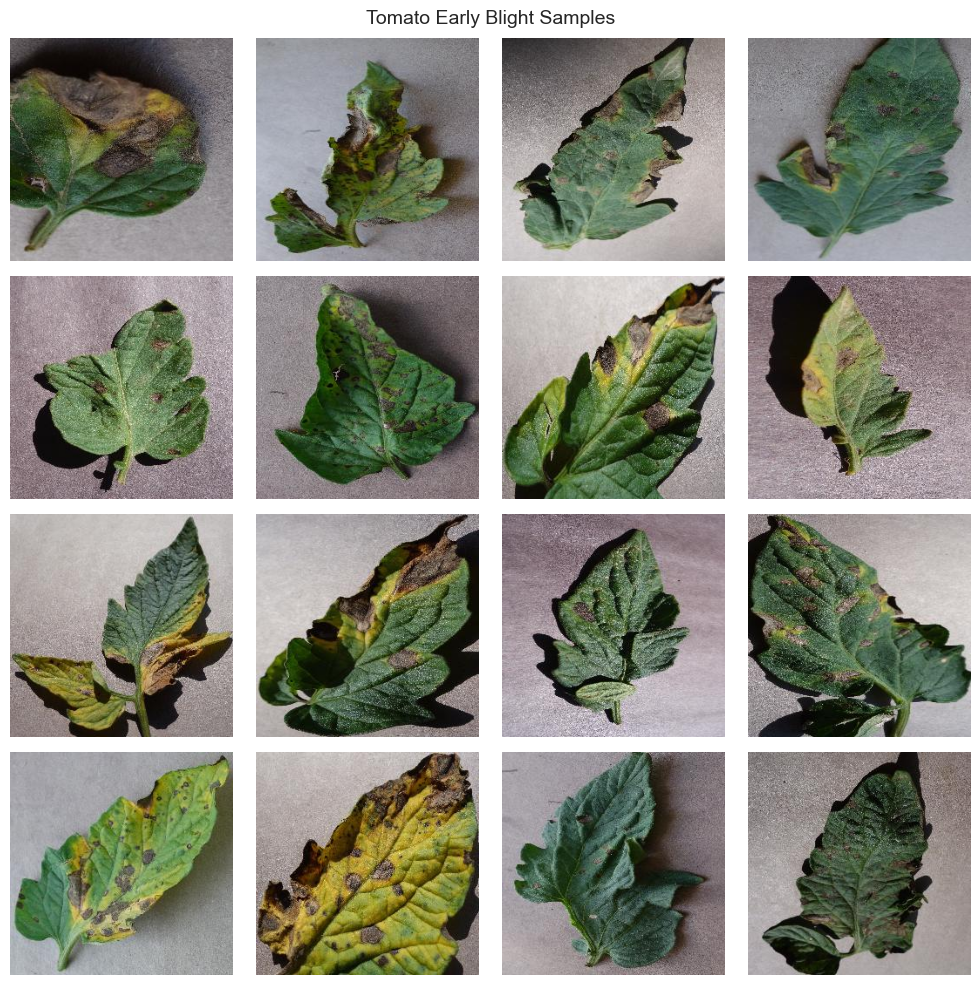

In [ ]:
# Sample Early Blight
sample_early = random.sample(early_files, k=16)
show_image_grid(
    sample_early,
    title="Tomato Early Blight Samples"
)

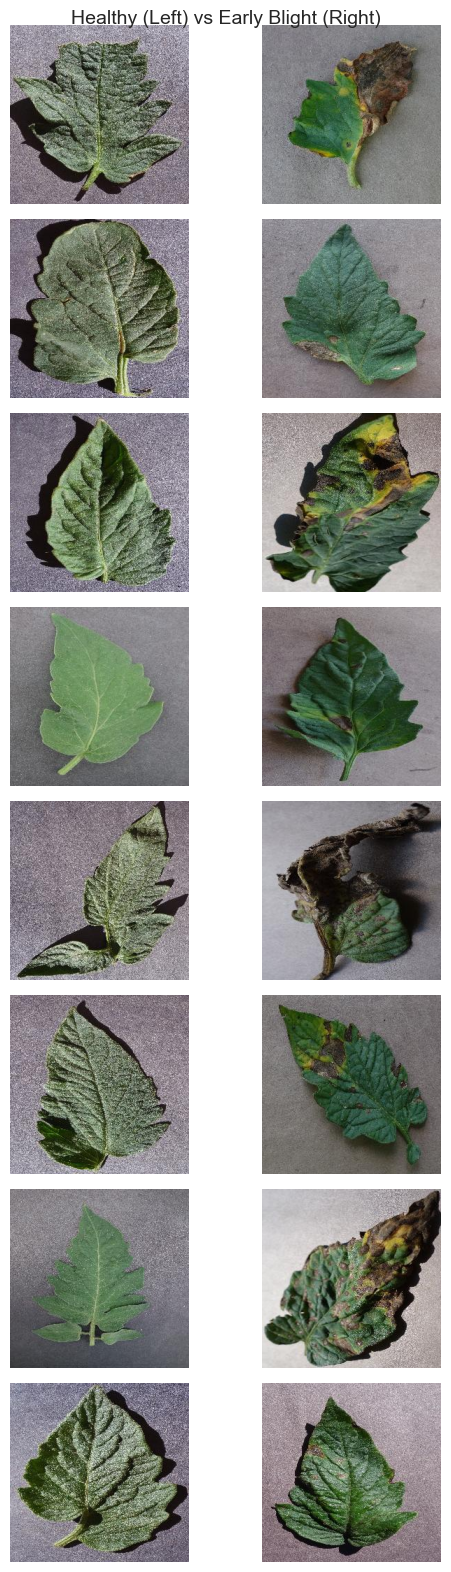

In [ ]:
# Compare healthy vs Early Blight
comparison_files = []
for h, e in zip(
    random.sample(healthy_files, 8),
    random.sample(early_files, 8)
):
    comparison_files.extend([h, e])

show_image_grid(
    comparison_files,
    title="Healthy (Left) vs Early Blight (Right)",
    n_rows=8,
    n_cols=2,
    figsize=(6, 16)
)

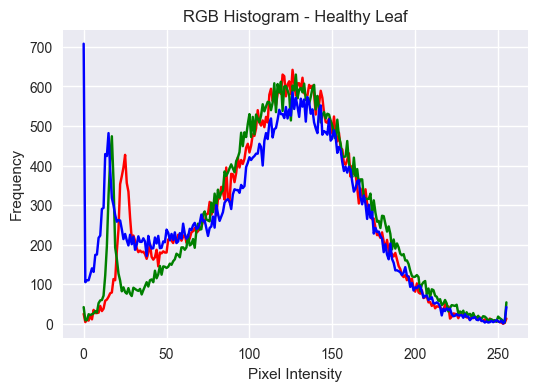

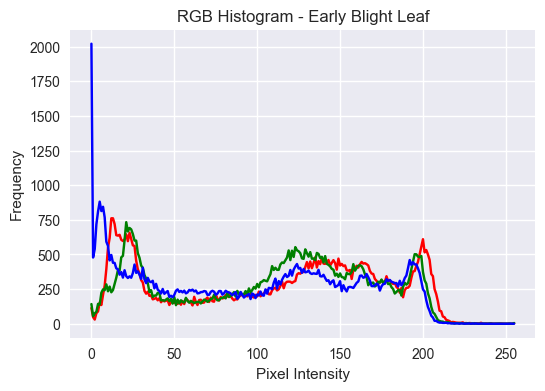

In [ ]:
# RGB 
def plot_rgb_histogram(image_path, title):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    colors = ("r", "g", "b")
    plt.figure(figsize=(6, 4))

    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)

    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_rgb_histogram(
    random.choice(healthy_files),
    title="RGB Histogram - Healthy Leaf"
)

plot_rgb_histogram(
    random.choice(early_files),
    title="RGB Histogram - Early Blight Leaf"
)

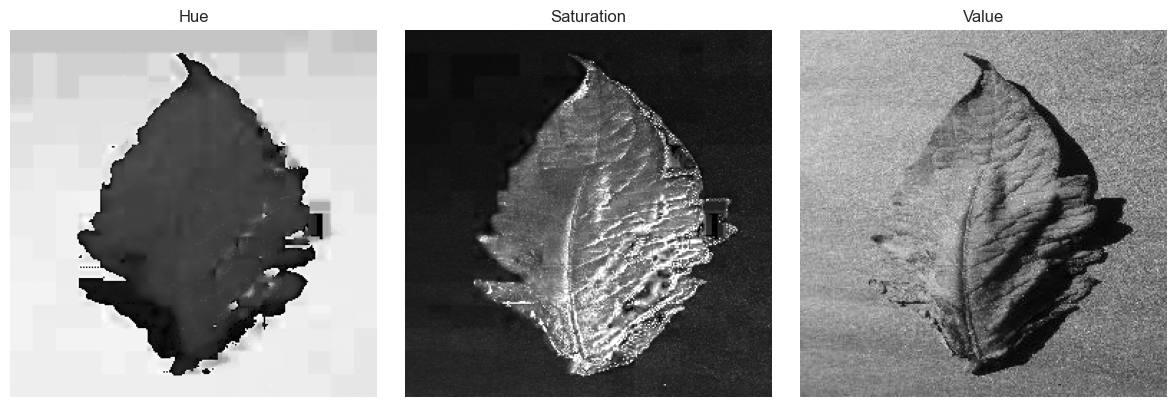

In [ ]:
# HVS
def show_hsv_channels(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    titles = ["Hue", "Saturation", "Value"]
    plt.figure(figsize=(12, 4))

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(hsv[:, :, i], cmap="gray")
        plt.title(titles[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_hsv_channels(random.choice(early_files))

## Insight

Visual inspection confirms that tomato early blight lesions manifest as spatially localized dark regions with irregular boundaries and varying severity levels. While color distribution differences exist between healthy and diseased leaves, reliance on global color cues alone may induce shortcut learning. HSV analysis further indicates that lesion regions are more distinguishable in brightness and saturation channels, supporting a two-stage segmentation approach where leaf regions are segmented prior to disease localization.